In [3]:
from classifiers import LDA, QDA
from generate_data import generate_data_scheme_1, generate_data_scheme_2
import numpy as np
import pandas as pd
import seaborn as sns


### Visualizing data

In [4]:
columns = ['y', 'x1', 'x2']

X, y = generate_data_scheme_2(1000, 2, 0.5)

data = np.vstack((y, X[:, 0], X[:, 1]))
df = pd.DataFrame(data.T, columns=columns)

<Axes: xlabel='x1', ylabel='x2'>

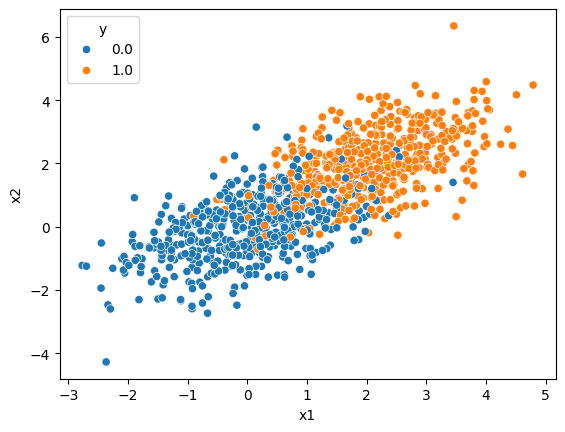

In [5]:
sns.scatterplot(data=df, x="x1", y="x2", hue="y")

### Visualising curves that separate classes

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    """
    Plots the decision boundary for a binary classification model.

    Args:
        X (np.array): Feature matrix.
        y (np.array): Target vector.
        model: Trained binary classification model with a `predict` method.
        title (str): Title of the plot.

    Returns:
        None
    """
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(title)

    # Create meshgrid for decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the labels for each point in meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)

    # Plot decision boundary
    plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


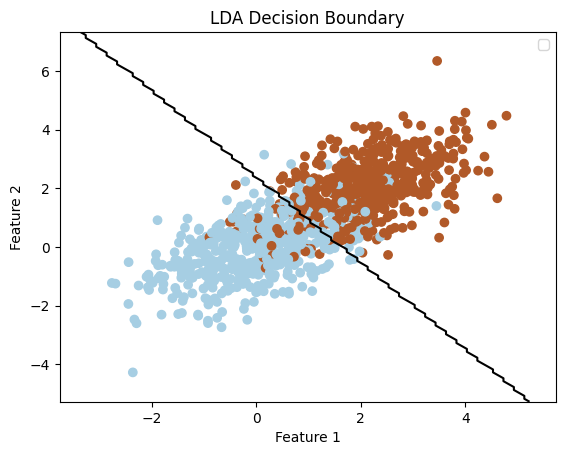

In [7]:
lda = LDA()
lda.fit(X, y)
plot_decision_boundary(X, y, lda, title="LDA Decision Boundary")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


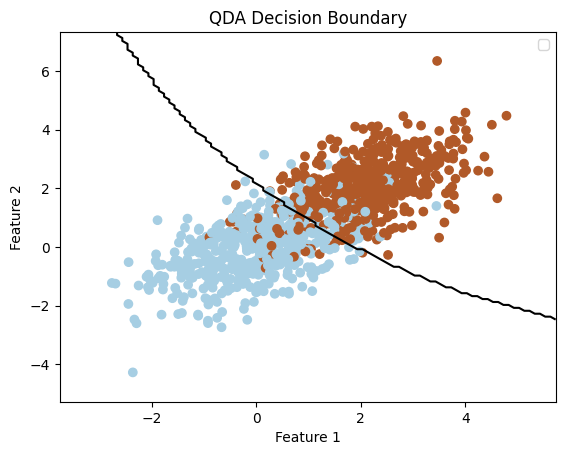

In [8]:
qda = QDA()
qda.fit(X, y)
plot_decision_boundary(X, y, qda, title="QDA Decision Boundary")